In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gabrielluizone_us_domestic_flights_delay_prediction_2013_2018_path = kagglehub.dataset_download('gabrielluizone/us-domestic-flights-delay-prediction-2013-2018')

print('Data source import complete.')


100%|██████████| 1.50G/1.50G [00:19<00:00, 83.3MB/s]

Extracting files...


Data source import complete.


In [3]:
import pandas as pd
# Use the path from the kagglehub download
data = pd.read_csv(gabrielluizone_us_domestic_flights_delay_prediction_2013_2018_path + "/flight_delay_predict.csv")

data

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,ORD,IL,900,0.0,0.0,1744.0,7,43.0,43.0,218.0
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,DFW,TX,1750,0.0,0.0,224.0,1,2.0,2.0,50.0
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,ORD,IL,1240,0.0,0.0,1744.0,7,26.0,26.0,220.0
3,1.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,LAX,CA,1905,0.0,0.0,1235.0,5,159.0,159.0,169.0
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,CLT,NC,1115,0.0,0.0,936.0,4,-13.0,0.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635585,1.0,2018,4,12,31,1,2018-12-31,AA,DFW,TX,DEN,CO,1440,0.0,0.0,641.0,3,24.0,24.0,100.0
1635586,0.0,2018,4,12,31,1,2018-12-31,DL,PHX,AZ,ATL,GA,1420,0.0,0.0,1587.0,7,-14.0,0.0,179.0
1635587,1.0,2018,4,12,31,1,2018-12-31,AA,ORD,IL,SFO,CA,1700,0.0,0.0,1846.0,8,39.0,39.0,272.0
1635588,0.0,2018,4,12,31,1,2018-12-31,AA,ORD,IL,LAX,CA,720,0.0,0.0,1744.0,7,-10.0,0.0,240.0


In [4]:
data.isnull().sum()



,0
is_delay,0
Year,0
Quarter,0
Month,0
DayofMonth,0
DayOfWeek,0
FlightDate,0
Reporting_Airline,0
Origin,0
OriginState,0


In [5]:
data.Reporting_Airline.value_counts()

,count
Reporting_Airline,
AA,593362
UA,492842
DL,270148
WN,181439
OO,97799


In [6]:
data.Origin.value_counts()

,count
Origin,
LAX,243778
ORD,213952
DFW,202683
SFO,201765
ATL,189967
DEN,186918
PHX,162353
IAH,132177
CLT,101997


In [7]:
data.OriginState.value_counts()


,count
OriginState,
CA,445543
TX,334860
IL,213952
GA,189967
CO,186918
AZ,162353
NC,101997


In [8]:
data.Dest.value_counts()


,count
Dest,
LAX,244848
ORD,216022
SFO,201693
DFW,201431
ATL,190907
DEN,184615
PHX,162280
IAH,131646
CLT,102148


In [9]:
data.DestState.value_counts()


,count
DestState,
CA,446541
TX,333077
IL,216022
GA,190907
CO,184615
AZ,162280
NC,102148


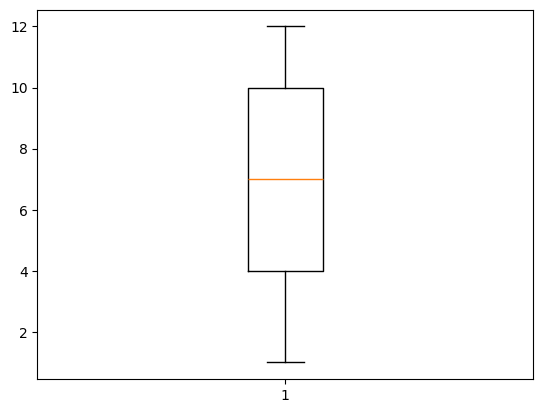

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(data.Month)
plt.show()

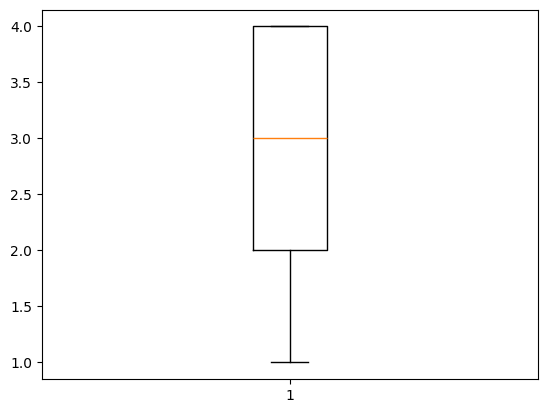

In [11]:
plt.boxplot(data.Quarter)
plt.show()

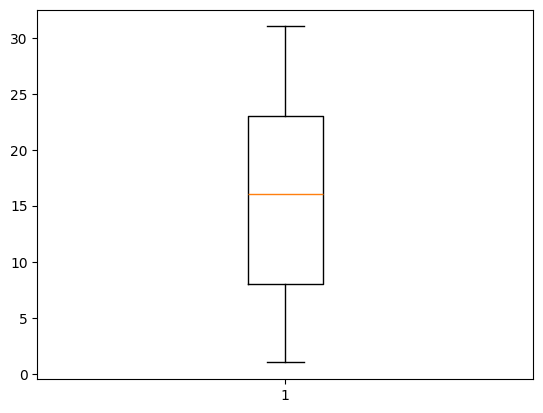

In [12]:
plt.boxplot(data.DayofMonth)
plt.show()

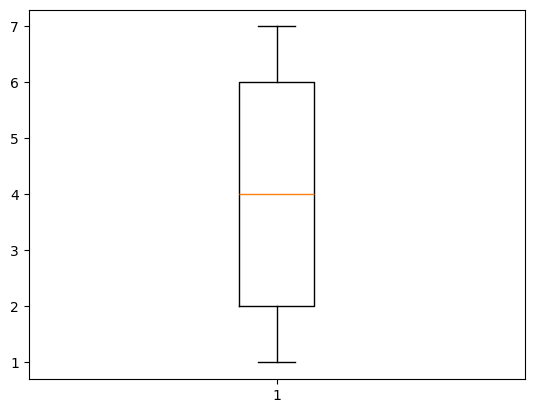

In [13]:
plt.boxplot(data.DayOfWeek)
plt.show()


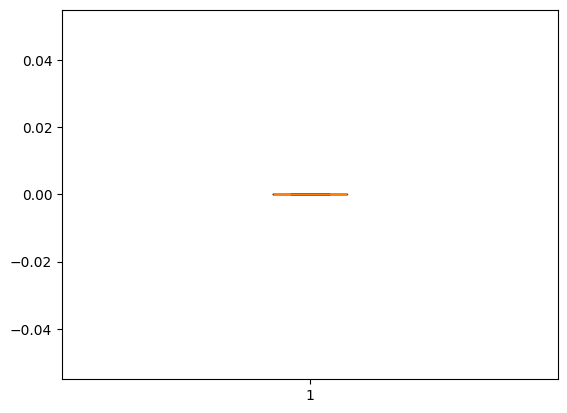

In [14]:
plt.boxplot(data.Cancelled)
plt.show()




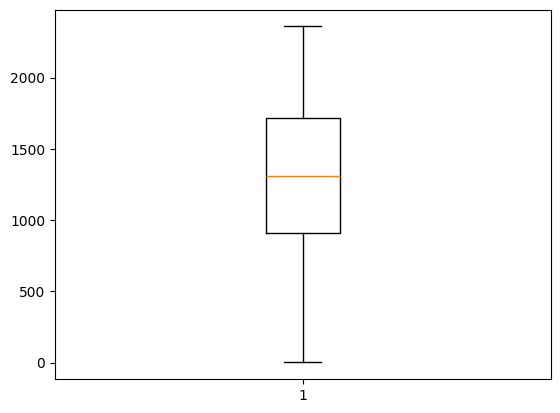

In [15]:
plt.boxplot(data.CRSDepTime)
plt.show()


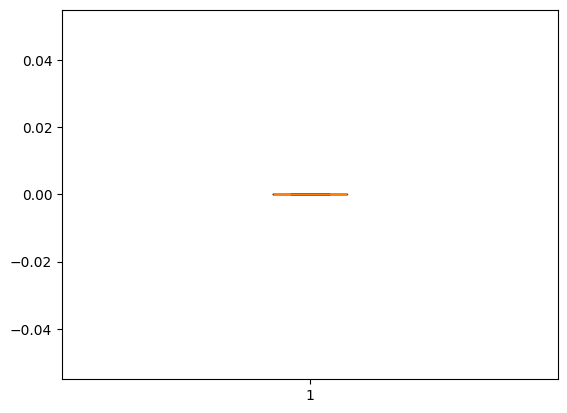

In [16]:
plt.boxplot(data.Diverted)
plt.show()


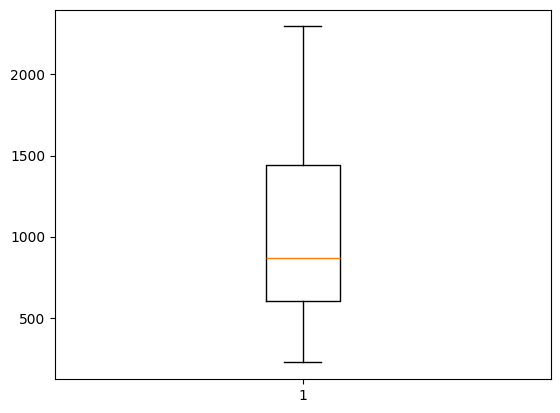

In [17]:
plt.boxplot(data.Distance)
plt.show()


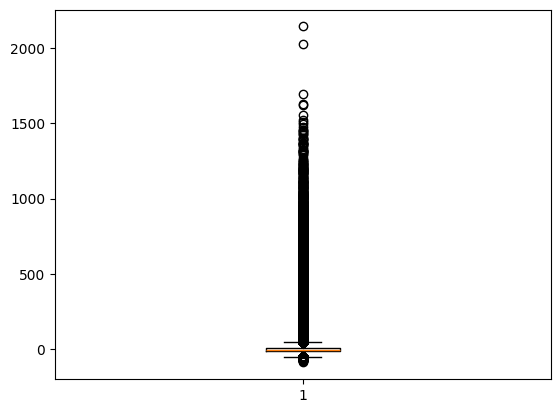

In [18]:
plt.boxplot(data.ArrDelay)
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def detect_outliers(series, method="iqr", threshold=3):
    """Detect outliers in a pandas Series"""
    series = series.dropna()
    if method == "iqr":
        Q1, Q3 = series.quantile([0.25, 0.75])
        IQR = Q3 - Q1
        mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    elif method == "zscore":
        z = np.abs(stats.zscore(series))
        mask = z > threshold
    elif method == "modified_zscore":
        med = np.median(series)
        mad = np.median(np.abs(series - med))
        mz = 0.6745 * (series - med) / mad
        mask = np.abs(mz) > 3.5
    else:
        raise ValueError("Method must be: 'iqr', 'zscore', or 'modified_zscore'")
    return series[mask]

def analyze_outliers(df, column):
    """Analyze outliers in a DataFrame column"""
    series = df[column].dropna()
    print(f"\nColumn: {column} ({len(series)} values)")
    print(f"Mean={series.mean():.2f}, Median={series.median():.2f}, Std={series.std():.2f}")
    print(f"Min={series.min():.2f}, Max={series.max():.2f}")

    methods = ["iqr", "zscore", "modified_zscore"]
    results = {}

    for m in methods:
        outliers = detect_outliers(series, method=m)
        perc = len(outliers) / len(series) * 100
        print(f"\n{m.upper()}: {len(outliers)} outliers ({perc:.2f}%)")
        if not outliers.empty:
            print(f"Examples: {outliers.values[:10]}...")
        results[m] = outliers

    visualize_outliers(series, results["iqr"], column)
    return results

def visualize_outliers(series, outliers, column):
    """Boxplot + Histogram"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.boxplot(series)
    ax1.set_title(f'Box Plot - {column}')

    ax2.hist(series, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    if not outliers.empty:
        ax2.hist(outliers, bins=30, alpha=0.7, color='red', label='Outliers')
        ax2.legend()
    ax2.set_title(f'Distribution - {column}')

    plt.tight_layout()
    plt.show()

def remove_outliers(df, column, method="iqr"):
    """Return DataFrame without outliers"""
    outliers = detect_outliers(df[column], method)
    return df[~df[column].isin(outliers)]


Column: ArrDelay (1635590 values)
Mean=6.02, Median=-4.00, Std=42.98
Min=-87.00, Max=2142.00

IQR: 140859 outliers (8.61%)
Examples: [159. 122. 137. 111. 129. 192.  56.  54. 258.  90.]...

ZSCORE: 29807 outliers (1.82%)
Examples: [ 159.  137.  192.  258.  147.  154.  226.  191. 1175.  394.]...

MODIFIED_ZSCORE: 121017 outliers (7.40%)
Examples: [159. 122. 137. 111. 129. 192.  56.  54. 258.  90.]...


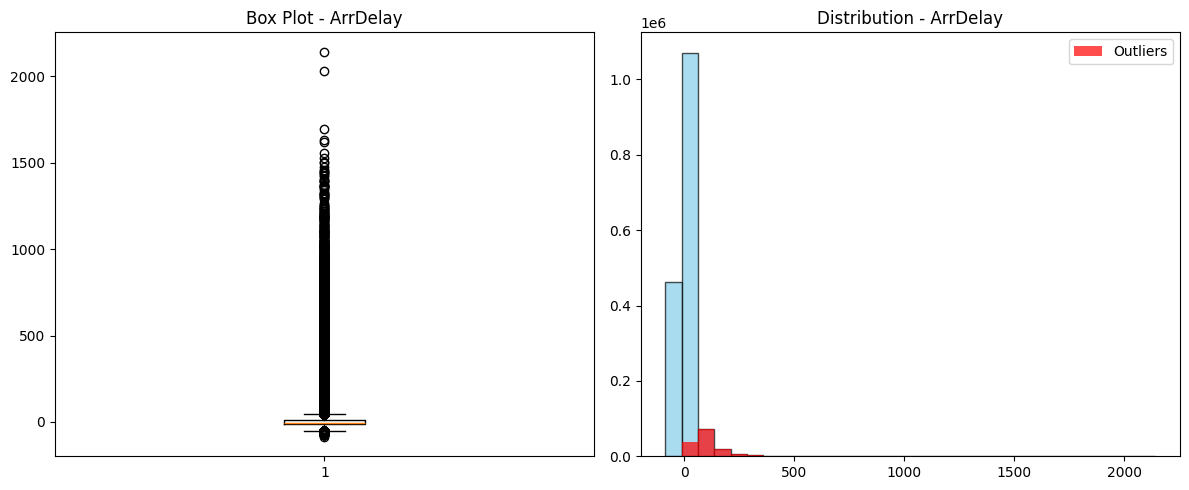

In [20]:
# Assuming your dataframe is already loaded as data
results = analyze_outliers(data, "ArrDelay")

# Remove outliers if needed
data = remove_outliers(data, "ArrDelay", method="iqr")


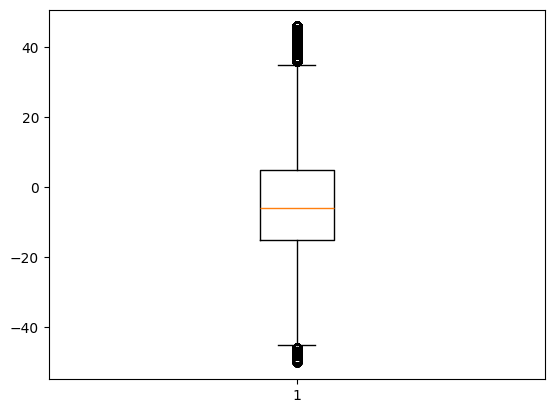

In [21]:
plt.boxplot(data.ArrDelay)
plt.show()


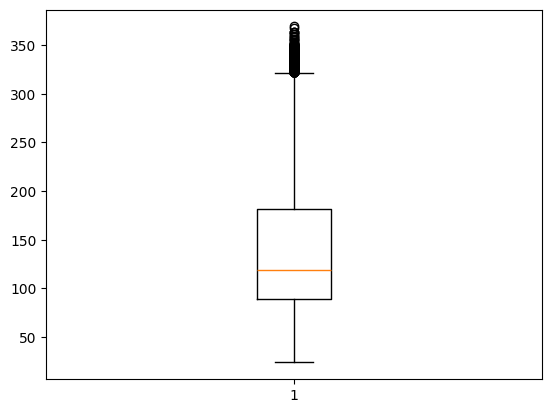

In [22]:
plt.boxplot(data.AirTime)
plt.show()


In [23]:
data=data[(data.AirTime<=325)&(data.AirTime>=50)]


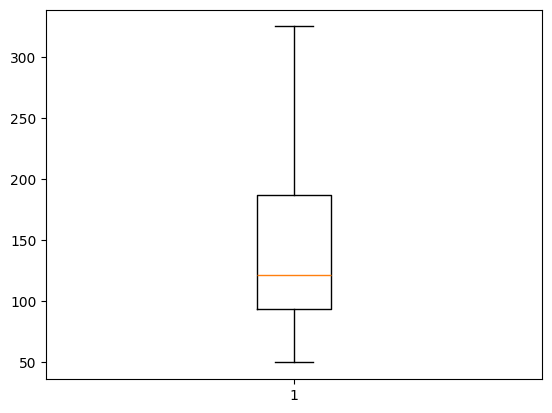

In [24]:
plt.boxplot(data.AirTime)
plt.show()

In [25]:
data=data.drop(columns=["ArrDelayMinutes"])

In [27]:
import os

# Create the directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

data.to_csv("/kaggle/working/finished.csv",index = False)

In [28]:
data.shape

(1409350, 19)

In [30]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()

data["Reporting_Airline"]=Encoder.fit_transform(data["Reporting_Airline"])
data["Origin"]=Encoder.fit_transform(data["Origin"])
data["OriginState"]=Encoder.fit_transform(data["OriginState"])
data["Dest"]=Encoder.fit_transform(data["Dest"])
data["DestState"]=Encoder.fit_transform(data["DestState"])



In [29]:
data

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,AirTime
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,ORD,IL,900,0.0,0.0,1744.0,7,43.0,218.0
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,DFW,TX,1750,0.0,0.0,224.0,1,2.0,50.0
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,ORD,IL,1240,0.0,0.0,1744.0,7,26.0,220.0
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,CLT,NC,1115,0.0,0.0,936.0,4,-13.0,108.0
5,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,SFO,CA,1605,0.0,0.0,1464.0,6,4.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635585,1.0,2018,4,12,31,1,2018-12-31,AA,DFW,TX,DEN,CO,1440,0.0,0.0,641.0,3,24.0,100.0
1635586,0.0,2018,4,12,31,1,2018-12-31,DL,PHX,AZ,ATL,GA,1420,0.0,0.0,1587.0,7,-14.0,179.0
1635587,1.0,2018,4,12,31,1,2018-12-31,AA,ORD,IL,SFO,CA,1700,0.0,0.0,1846.0,8,39.0,272.0
1635588,0.0,2018,4,12,31,1,2018-12-31,AA,ORD,IL,LAX,CA,720,0.0,0.0,1744.0,7,-10.0,240.0


In [31]:
data["FlightDate"]=Encoder.fit_transform(data["FlightDate"])

In [32]:
data

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,AirTime
0,1.0,2014,1,1,1,3,0,3,5,1,6,4,900,0.0,0.0,1744.0,7,43.0,218.0
1,0.0,2014,1,1,1,3,0,0,4,6,3,6,1750,0.0,0.0,224.0,1,2.0,50.0
2,1.0,2014,1,1,1,3,0,0,5,1,6,4,1240,0.0,0.0,1744.0,7,26.0,220.0
4,0.0,2014,1,1,1,3,0,0,3,6,1,5,1115,0.0,0.0,936.0,4,-13.0,108.0
5,0.0,2014,1,1,1,3,0,0,3,6,8,1,1605,0.0,0.0,1464.0,6,4.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635585,1.0,2018,4,12,31,1,1825,0,3,6,2,2,1440,0.0,0.0,641.0,3,24.0,100.0
1635586,0.0,2018,4,12,31,1,1825,1,7,0,0,3,1420,0.0,0.0,1587.0,7,-14.0,179.0
1635587,1.0,2018,4,12,31,1,1825,0,6,4,8,1,1700,0.0,0.0,1846.0,8,39.0,272.0
1635588,0.0,2018,4,12,31,1,1825,0,6,4,5,1,720,0.0,0.0,1744.0,7,-10.0,240.0


In [33]:
x=data.drop(columns=["is_delay","ArrDelay"],axis=1)
y=data["is_delay"]

In [34]:
x

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,AirTime
0,2014,1,1,1,3,0,3,5,1,6,4,900,0.0,0.0,1744.0,7,218.0
1,2014,1,1,1,3,0,0,4,6,3,6,1750,0.0,0.0,224.0,1,50.0
2,2014,1,1,1,3,0,0,5,1,6,4,1240,0.0,0.0,1744.0,7,220.0
4,2014,1,1,1,3,0,0,3,6,1,5,1115,0.0,0.0,936.0,4,108.0
5,2014,1,1,1,3,0,0,3,6,8,1,1605,0.0,0.0,1464.0,6,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635585,2018,4,12,31,1,1825,0,3,6,2,2,1440,0.0,0.0,641.0,3,100.0
1635586,2018,4,12,31,1,1825,1,7,0,0,3,1420,0.0,0.0,1587.0,7,179.0
1635587,2018,4,12,31,1,1825,0,6,4,8,1,1700,0.0,0.0,1846.0,8,272.0
1635588,2018,4,12,31,1,1825,0,6,4,5,1,720,0.0,0.0,1744.0,7,240.0


In [35]:
y

,is_delay
0,1.0
1,0.0
2,1.0
4,0.0
5,0.0
...,...
1635585,1.0
1635586,0.0
1635587,1.0
1635588,0.0


In [36]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
x=Scaler.fit_transform(x)
x

array([[0.        , 0.        , 0.        , ..., 0.73359073, 0.66666667,
        0.61090909],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.73359073, 0.66666667,
        0.61818182],
       ...,
       [1.        , 1.        , 1.        , ..., 0.78281853, 0.77777778,
        0.80727273],
       [1.        , 1.        , 1.        , ..., 0.73359073, 0.66666667,
        0.69090909],
       [1.        , 1.        , 1.        , ..., 0.20125483, 0.22222222,
        0.15636364]])

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=23, stratify=y)


In [38]:
xtrain

array([[0.        , 0.33333333, 0.36363636, ..., 0.83156371, 0.77777778,
        0.69090909],
       [0.25      , 0.        , 0.18181818, ..., 0.20608108, 0.22222222,
        0.13818182],
       [0.75      , 1.        , 0.90909091, ..., 0.18243243, 0.22222222,
        0.10909091],
       ...,
       [0.5       , 0.66666667, 0.72727273, ..., 0.31081081, 0.33333333,
        0.23636364],
       [0.25      , 0.66666667, 0.63636364, ..., 0.20125483, 0.22222222,
        0.12      ],
       [0.5       , 0.66666667, 0.72727273, ..., 0.18098456, 0.22222222,
        0.18909091]])

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000, solver = 'lbfgs')
lr.fit(xtrain,ytrain)
predict=lr.predict(xtest)


In [40]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(ytest, predict)

0.8628126441267251

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(ytest, predict)

# Precision
precision = precision_score(ytest, predict)

# Recall
recall = recall_score(ytest, predict)

# F1 Score
f1 = f1_score(ytest, predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Or just print all in one go:
print("\nClassification Report:\n", classification_report(ytest, predict))

Accuracy: 0.8628126441267251
Precision: 0.8827838827838828
Recall: 0.006198878543134935
F1 Score: 0.012311307501724093

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    242992
         1.0       0.88      0.01      0.01     38878

    accuracy                           0.86    281870
   macro avg       0.87      0.50      0.47    281870
weighted avg       0.87      0.86      0.80    281870



In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with class weights
lr = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
lr.fit(xtrain, ytrain)

# Predictions
y_pred = lr.predict(xtest)

# Evaluation
print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, y_pred))


Accuracy: 0.6059992194983503

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.61      0.73    242992
         1.0       0.19      0.59      0.29     38878

    accuracy                           0.61    281870
   macro avg       0.55      0.60      0.51    281870
weighted avg       0.81      0.61      0.67    281870


Confusion Matrix:
 [[147863  95129]
 [ 15928  22950]]


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with class weights
lr = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
lr.fit(xtrain, ytrain)

# Predictions
y_pred = lr.predict(xtest)

# Evaluation
print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, y_pred))



Accuracy: 0.6059992194983503

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.61      0.73    242992
         1.0       0.19      0.59      0.29     38878

    accuracy                           0.61    281870
   macro avg       0.55      0.60      0.51    281870
weighted avg       0.81      0.61      0.67    281870


Confusion Matrix:
 [[147863  95129]
 [ 15928  22950]]


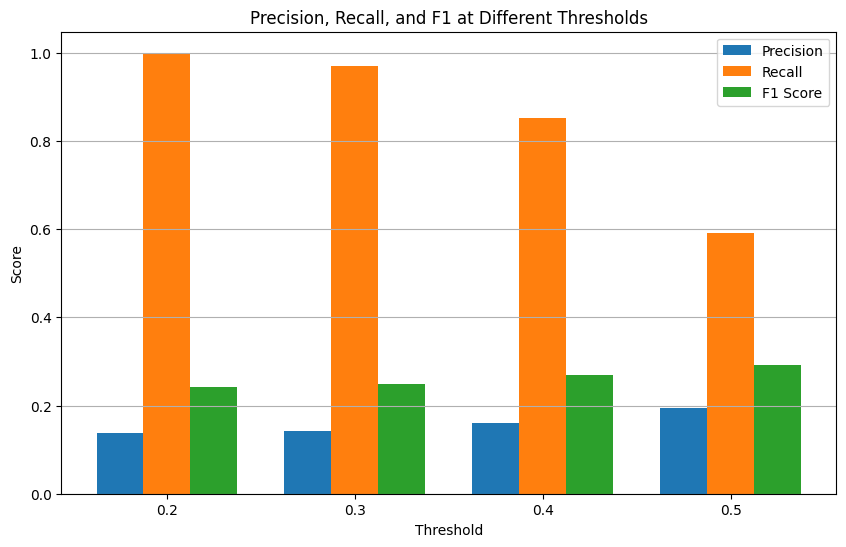

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities for class 1 (delayed)
y_prob = lr.predict_proba(xtest)[:, 1]

# Define thresholds
thresholds = [0.2, 0.3, 0.4, 0.5]

# Collect metrics
results = {"Threshold": [], "Precision": [], "Recall": [], "F1 Score": []}

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    results["Threshold"].append(t)
    results["Precision"].append(precision_score(ytest, y_pred_thresh))
    results["Recall"].append(recall_score(ytest, y_pred_thresh))
    results["F1 Score"].append(f1_score(ytest, y_pred_thresh))

# Convert to numpy arrays for plotting
x = np.arange(len(thresholds))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, results["Precision"], width, label="Precision")
plt.bar(x, results["Recall"], width, label="Recall")
plt.bar(x + width, results["F1 Score"], width, label="F1 Score")

plt.xticks(x, [str(t) for t in thresholds])
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 at Different Thresholds")
plt.legend()
plt.grid(axis="y")
plt.show()


Decision Tree Performance:
Accuracy : 0.7869869088586937
Precision: 0.25403282041746084
Recall   : 0.2811101394104635
F1 Score : 0.26688644688644686

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88    242992
         1.0       0.25      0.28      0.27     38878

    accuracy                           0.79    281870
   macro avg       0.57      0.57      0.57    281870
weighted avg       0.80      0.79      0.79    281870



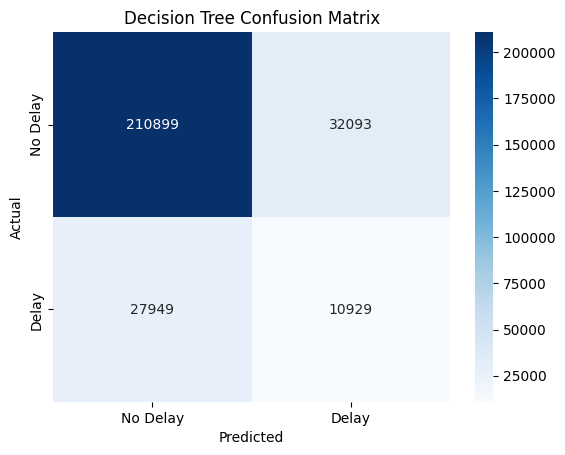

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(
    criterion="gini",     # you can also try "entropy"
    max_depth=None,       # limit depth to prevent overfitting
    random_state=42
)

# Train on training data
dt.fit(xtrain, ytrain)

# Predict on test data
dt_predict = dt.predict(xtest)

# --- Evaluation Metrics ---
accuracy = accuracy_score(ytest, dt_predict)
precision = precision_score(ytest, dt_predict)
recall = recall_score(ytest, dt_predict)
f1 = f1_score(ytest, dt_predict)

print("Decision Tree Performance:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Detailed Report
print("\nClassification Report:\n", classification_report(ytest, dt_predict))

# --- Confusion Matrix ---
cm = confusion_matrix(ytest, dt_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Delay','Delay'],
            yticklabels=['No Delay','Delay'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


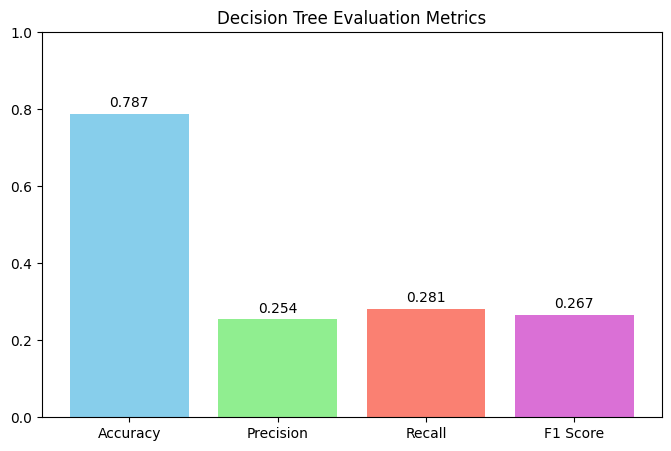

In [46]:
import matplotlib.pyplot as plt

# Metrics for bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create bar graph
plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'orchid'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.ylim(0,1)  # since all metrics are between 0 and 1
plt.title("Decision Tree Evaluation Metrics")
plt.show()


Random Forest Performance:
Accuracy : 0.8655124702877213
Precision: 0.5537813262364161
Recall   : 0.12845310972786667
F1 Score : 0.2085351595122766

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    242992
         1.0       0.55      0.13      0.21     38878

    accuracy                           0.87    281870
   macro avg       0.71      0.56      0.57    281870
weighted avg       0.83      0.87      0.83    281870



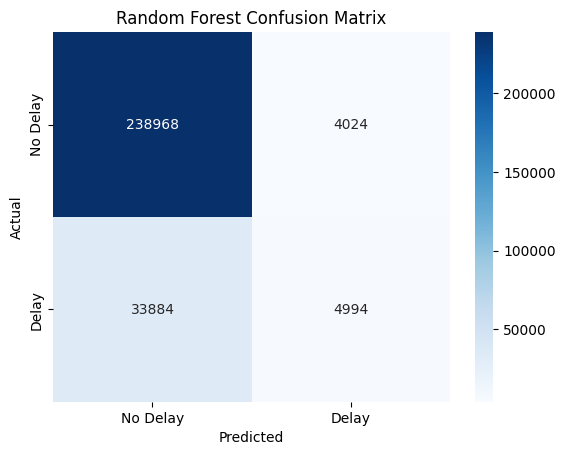

You can check which features contribute the most to flight delay prediction:
              Feature  Importance
16            AirTime    0.216525
11         CRSDepTime    0.183808
5          FlightDate    0.175818
3          DayofMonth    0.146038
4           DayOfWeek    0.084679
2               Month    0.047951
6   Reporting_Airline    0.025494
14           Distance    0.024001
0                Year    0.016955
7              Origin    0.015295
1             Quarter    0.014944
9                Dest    0.014648
8         OriginState    0.011352
10          DestState    0.011259
15      DistanceGroup    0.011234
12          Cancelled    0.000000
13           Diverted    0.000000


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    criterion="gini",     # can also use "entropy"
    max_depth=None,       # limit tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1             # use all CPU cores for faster training
)

# Train the model
rf.fit(xtrain, ytrain)

# Predictions
rf_predict = rf.predict(xtest)

# --- Evaluation Metrics ---
accuracy = accuracy_score(ytest, rf_predict)
precision = precision_score(ytest, rf_predict)
recall = recall_score(ytest, rf_predict)
f1 = f1_score(ytest, rf_predict)

print("Random Forest Performance:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Detailed Report
print("\nClassification Report:\n", classification_report(ytest, rf_predict))

# --- Confusion Matrix ---
cm = confusion_matrix(ytest, rf_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Delay','Delay'],
            yticklabels=['No Delay','Delay'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()
#Feature Importance (Extra Insight)
print("You can check which features contribute the most to flight delay prediction:")

#python
#Copy code
import pandas as pd

# Get the feature names from the original data before scaling
feature_names = data.drop(columns=["is_delay", "ArrDelay"], axis=1).columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

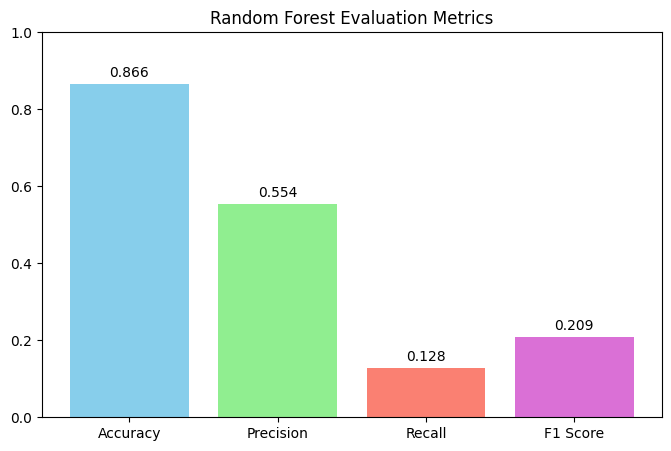

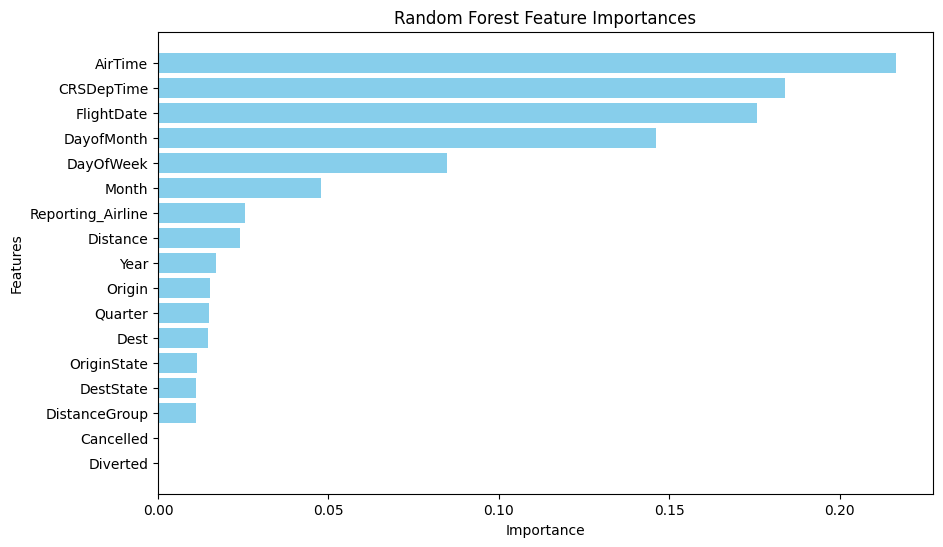

In [49]:
import matplotlib.pyplot as plt

# --- Bar graph for evaluation metrics ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'orchid'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.ylim(0,1)
plt.title("Random Forest Evaluation Metrics")
plt.show()


# --- Horizontal bar graph for feature importances ---
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


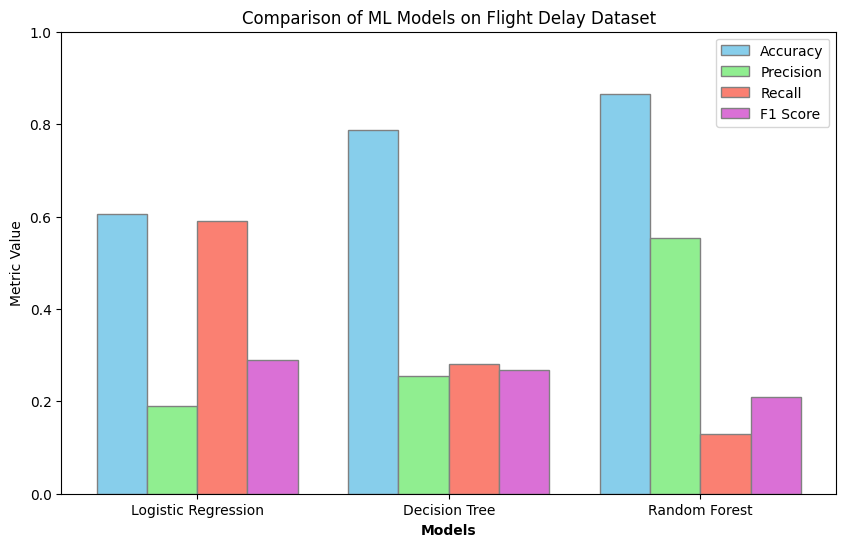

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy = [0.6059779330897223, 0.7869869088586937, 0.8655124702877213]
precision = [0.19, 0.25403282041746084, 0.5537813262364161]
recall = [0.59, 0.2811101394104635, 0.12845310972786667]
f1 = [0.29, 0.2668864468864469, 0.20853515951227664]

# Width of each bar
barWidth = 0.2
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(10,6))

# Create bars
plt.bar(r1, accuracy, width=barWidth, color='skyblue', edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, width=barWidth, color='lightgreen', edgecolor='grey', label='Precision')
plt.bar(r3, recall, width=barWidth, color='salmon', edgecolor='grey', label='Recall')
plt.bar(r4, f1, width=barWidth, color='orchid', edgecolor='grey', label='F1 Score')

# Labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Metric Value')
plt.title('Comparison of ML Models on Flight Delay Dataset')
plt.xticks([r + 1.5*barWidth for r in range(len(models))], models)
plt.ylim(0,1)
plt.legend()
plt.show()


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Remove constant columns from the original DataFrame
xtrain_df = pd.DataFrame(xtrain)  # if not already a DataFrame
xtrain_df = xtrain_df.loc[:, xtrain_df.nunique() > 1]

# 2. Standardize (for models like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(xtrain_df)  # NumPy array for feature selection

# 3. Feature Selection: Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, ytrain)

# 4. Get selected feature names from original DataFrame
selected_features = xtrain_df.columns[selector.get_support()]
print("Top 10 selected features:")
print(selected_features)


Top 10 selected features:
Index([0, 5, 6, 7, 9, 10, 11, 14, 15, 16], dtype='int64')


In [53]:
from sklearn.utils import resample
import numpy as np
n_iterations = 10
print("\n--- Bootstrapping ---")

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

n_samples = len(xtrain)

for name, model in models.items():
    bootstrap_accuracies = []
    for i in range(n_iterations):
        # Resample indices
        resampled_indices = resample(
            np.arange(n_samples), replace=True, n_samples=n_samples, random_state=42+i
        )

        # Bootstrap dataset
        X_resampled = xtrain[resampled_indices]       # NumPy
        y_resampled = ytrain.iloc[resampled_indices]  # pandas Series with iloc

        # OOB indices
        oob_indices = np.setdiff1d(np.arange(n_samples), resampled_indices)

        if len(oob_indices) == 0:
            continue  # skip if no OOB samples

        X_oob = xtrain[oob_indices]
        y_oob = ytrain.iloc[oob_indices]

        # Train and evaluate
        model.fit(X_resampled, y_resampled)
        acc = model.score(X_oob, y_oob)
        bootstrap_accuracies.append(acc)

    print(f"{name} Bootstrapped Accuracy Scores: {bootstrap_accuracies}")

    print(f"{name} Mean Bootstrapped Accuracy: {np.mean(bootstrap_accuracies):.4f}")



--- Bootstrapping ---
Logistic Regression Bootstrapped Accuracy Scores: [0.8623150826022669, 0.8629704315647202, 0.8623308062241614, 0.8621187928530659, 0.8627611654322892, 0.8632523288878402, 0.863067607746304, 0.8627581965730547, 0.8631052315904334, 0.8624562908624708]
Logistic Regression Mean Bootstrapped Accuracy: 0.8627
Decision Tree Bootstrapped Accuracy Scores: [0.7814133442038511, 0.7835816041111039, 0.7817903503802717, 0.7806693688030885, 0.7819622625138882, 0.7839172507445941, 0.7820116180091198, 0.782136957229504, 0.7815782691117208, 0.7820049691656284]
Decision Tree Mean Bootstrapped Accuracy: 0.7821
Random Forest Bootstrapped Accuracy Scores: [0.8610969735417063, 0.8611611025583575, 0.8607446334084636, 0.860310143608195, 0.8613319708184007, 0.8619160324274607, 0.8613048919583025, 0.8608698797795757, 0.8612119445695663, 0.8608513130212865]
Random Forest Mean Bootstrapped Accuracy: 0.8611


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define models
Amodels = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# 5-fold Cross-Validation
print("\n--- Cross-Validation ---")
for name, model in models.items():
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy Scores: {scores}")
    print(f"{name} Mean CV Accuracy: {np.mean(scores):.4f}\n")


--- Cross-Validation ---
Logistic Regression CV Accuracy Scores: [0.86283127 0.86281353 0.86280023 0.86274258 0.86275145]
Logistic Regression Mean CV Accuracy: 0.8628

Decision Tree CV Accuracy Scores: [0.78439972 0.78443077 0.78450172 0.78480328 0.78468354]
Decision Tree Mean CV Accuracy: 0.7846

Random Forest CV Accuracy Scores: [0.86414837 0.86439227 0.86403306 0.8641661  0.86418384]
Random Forest Mean CV Accuracy: 0.8642



In [54]:
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Convert to DataFrame/Series if not already
if isinstance(xtrain, np.ndarray):
    xtrain_df = pd.DataFrame(xtrain)
else:
    xtrain_df = xtrain.copy()

if isinstance(ytrain, np.ndarray):
    ytrain_s = pd.Series(ytrain)
else:
    ytrain_s = ytrain.copy()

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# Bootstrapping
n_iterations = 10
for name, model in models.items():
    bootstrap_accuracies = []
    for i in range(n_iterations):
        X_resampled, y_resampled = resample(xtrain_df, ytrain_s, replace=True, random_state=42+i)
        # Out-of-bag samples
        oob_mask = ~xtrain_df.index.isin(X_resampled.index)
        X_oob = xtrain_df.loc[oob_mask]
        y_oob = ytrain_s.loc[oob_mask]

        model.fit(X_resampled, y_resampled)




        if len(X_oob) > 0:  # Ensure there are OOB samples
            acc = model.score(X_oob, y_oob)
            bootstrap_accuracies.append(acc)
    print(f"{name} Bootstrapped Accuracy Scores: {bootstrap_accuracies}")
    print(f"{name} Mean Bootstrapped Accuracy: {np.mean(bootstrap_accuracies):.4f}\n")


Logistic Regression Bootstrapped Accuracy Scores: [0.8623150826022669, 0.8629704315647202, 0.8623308062241614, 0.8621187928530659, 0.8627611654322892, 0.8632523288878402, 0.863067607746304, 0.8627581965730547, 0.8631052315904334, 0.8624562908624708]
Logistic Regression Mean Bootstrapped Accuracy: 0.8627

Decision Tree Bootstrapped Accuracy Scores: [0.781536361158482, 0.7832081740232394, 0.7817180324707413, 0.7804405782860941, 0.7819863636034985, 0.7838402030207523, 0.7820164407609338, 0.7822864791211971, 0.7818095102745748, 0.7823303025118145]
Decision Tree Mean Bootstrapped Accuracy: 0.7821

Random Forest Bootstrapped Accuracy Scores: [0.8613381832566689, 0.861233379349557, 0.8609688189280075, 0.8604209263848449, 0.8610355274161945, 0.861607841532094, 0.8613965242427677, 0.8610218133146833, 0.8613444264857847, 0.8607476883258346]
Random Forest Mean Bootstrapped Accuracy: 0.8611



**Important Considerations:**

*   This UI requires the **encoded numerical values** for categorical features like 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest', and 'DestState'. The original LabelEncoder objects are not directly accessible in the UI, so you would need a way to provide or map the original values to their encoded counterparts before using the UI in a production environment.
*   The `rf` and `Scaler` objects must be trained and fitted in previous cells and available in the environment where this Gradio code is executed.